# 11 機械学習の基礎（教師あり学習）

- **[11.1 機械学習の全体像](#11.1-機械学習の全体像)**
    - [11.1.1 機械学習とは？](#11.1.1-機械学習とは？)
    - [11.1.2 教師あり学習](#11.1.2-教師あり学習)
    - [11.1.3 教師なし学習](#11.1.3-教師なし学習)
    - [11.1.4 強化学習](#11.1.4-強化学習)
<br><br>
- **[11.2 重回帰分析](#11.2-重回帰分析)** 
<br><br>
- **[11.3 ロジスティック回帰分析](#11.3-ロジスティック回帰分析)** 
<br><br>
- **[11.4 正則化、ラッソ回帰、リッジ回帰](#11.4-正則化、ラッソ回帰、リッジ回帰)** 
<br><br>
- **[11.5 決定木](#11.5-決定木)** 
<br><br>
- **[11.6 k-NN](#11.6-k-NN)** 
<br><br>
- **[11.7 サポートベクターマシン](#11.7-サポートベクターマシン)** 
<br><br>
- **[11.8 総合問題](#11.8-総合問題)**
    - [11.8.1 総合問題1](#11.8.1-総合問題1)
    - [11.8.2 総合問題2](#11.8.2-総合問題2)
    - [11.8.3 総合問題3](#11.8.3-総合問題3)

## 11.1 機械学習の全体像
ゴール：機械学習の各アプローチ（教師あり学習、教師なし学習）と概要を知ること

In [3]:
# 途中で使用するため、あらかじめ読み込んでおいてください。
# データ加工・処理・分析モジュール
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series, DataFrame
import pandas as pd

# 可視化モジュール
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# 機械学習モジュール
import sklearn

# 小数第３まで表示
%precision 3

'%.3f'

### 11.1.1 機械学習とは？
キーワード：機械学習、教師あり学習、教師なし学習、強化学習

いよいよここから機械学習の章になります。これまで様々なデータを見てきました。そのデータの中から、モデルを構築し、ある値を予測をしたりグループ分けしたりするのが**機械学習**です。

機械学習は主に3つに分けられることが多く、**教師あり学習(supervised learning)**、**教師なし学習(unsupervised learning)**、**強化学習(reinforcement learning)**に分けられます。（この分け方以外にも、教師あり学習と教師なし学習の2つに分けたり、上の3つに半教師あり学習を加えて4つに分けてあることもありますが、ここでは3つに分けて考えることにします。）

まずは、教師あり学習です。これは、その名の通り、教師が与えられて、その状態・データからモデルを構築します。目的がはっきりしている場合で、目的型学習とも言われます。訓練データ（学習データ）があり、そこから目的の変数（アウトプット）を予測するために説明変数を使ってモデルを構築する方法です。色々な手法があり、後ほど説明します。

一方、教師なし学習は、目的がなく、データの構造から傾向を見る方法をいいます。ゴールがはっきりしておらず、試行錯誤しながらするやり方です。探索型のデータ分析とも言われます。

以下は、教師あり学習と教師なし学習のイメージです。左図が教師あり学習で、あらかじめラベル付け（以下は丸とバツ）がされていて、丸とバツに分けたいというモチベーションがあります。例えば、x1とx2の2つの軸を持つデータが与えられてプロットし、それが丸なのかバツなのかを予測します。一方、右図が教師なし学習で、ラベル付けは特にされておらず、与えられたデータ構造からインサイト（以下の赤丸に囲まれているグループが2つできそうだ）を見つけ出していきます。

![](http://oliviaklose.azurewebsites.net/content/images/2015/02/2-supervised-vs-unsupervised-1.png)

参照URL:http://oliviaklose.azurewebsites.net/content/images/2015/02/2-supervised-vs-unsupervised-1.png

そして、3つ目の強化学習も最近注目されており、面白い分野なのですが、ここでは紹介するだけにとどめ、主に教師あり学習と教師なし学習を中心に学んでいきます。

なお、今回の章で扱うデータ分析は、いきなり機械学習を適応するところから始めます。簡単に機械学習を使えることを体感していただきたいからです。ただし、実際に本番でデータ分析をするときには、どんなデータがあるのか細かくチェックしたり、基本統計量やヒストグラム、散布図の作成など、探索的にデータを観察することは必ず実施してください。そういった簡単なデータ探索から色々なことがわかったりすることがあるからです。ビジネスの現場で、無理に機械学習をあてはめる必要はありません。もちろん、機械学習を通して有益な示唆や収益源が見つかることもあるので、手法の使い分けが重要です。

>**[ポイント]**

>現場でデータ分析をするときは、機械学習を適応する前に、基本統計量や散布図を作成し、データの傾向や全体像を抑えましょう。

参考ですが、機械学習の易しめの本としては、以下の文献やURLが参考になりますので、この章の良い予習・復習になります。

>[参考文献]

>『Pythonによる機械学習入門』（株式会社システム計画研究所 (編集)、オーム社）

>『Introduction to Machine Learning with Python』（Andreas C.Muller & Sarah Guido、O'REILLY）

>『ゼロからはじめるデータサイエンス ―Pythonで学ぶ基本と実践』（Joel Grus (著), 菊池 彰 (翻訳)、O'REILLY）

>[参考URL]

>https://github.com/jakevdp/PythonDataScienceHandbook

また、この章では主に、Pythonのscikit-learn（サイキットラーン）を使います。以前、回帰分析の章で少し使いました。以下のサイトに、scikit-learnの詳細な情報や使い方がありますので、この講座が終わった後は是非読んでみてください。

>[参考URL]

>http://scikit-learn.org/stable/index.html

ビジネス的な視点で機械学習（とデータサイエンス）を活かすことを学ぶには以下のものが良いです。URLには色々な資料等あるようなので、参考にしてください。

>[参考文献]

>『戦略的データサイエンス入門 ―ビジネスに活かすコンセプトとテクニック』（Foster Provost (著), Tom Fawcett (著), 竹田 正和(監訳) (翻訳), 古畠 敦 (翻訳), & 8 その他、オライリージャパン）

>[参考URL]

>http://www.data-science-for-biz.com/DSB/Home.html

### 11.1.2 教師あり学習
キーワード：目的変数、説明変数、回帰、分類

まずは簡単に教師あり学習について紹介します。先ほど説明したように、あらかじめ教師データと言われる見本が与えられており、それをベースにモデルを構築します。データのカラム（変数）について、ゴールとなる予測したい変数のことを**目的変数**と言います（他の名称としては、応答変数、ターゲット変数、従属変数とも言われます）。関数y=f(x)でいうところのyにあたります。一方、その目的変数を説明するための変数xのことを**説明変数**と言います（他には予測変数だったり、独立変数と言われることもありますので注意してください）。

具体的には、ある消費財について、購買者が離反するかどうか（目的変数）を予測したい時に、過去の色々なデータ（属性、購買頻度、関連商品の購入など）を説明変数としてモデリングします。

目的変数については、それが数値の場合だったり、どのグループに属するのか予測したい場合があります。数値の場合は**回帰**、何かのグループに分ける時どのグループに属するのか分けるのが**分類**といいます。この講座ではどちらのデータも扱っていきます。教師あり学習の手法としては、**重回帰分析、ロジスティック回帰分析、k近傍法、決定木、サポートベクターマシン、ランダムフォレスト**等があります。

なお、目的にもよりますが、ビジネスの現場では、重回帰分析、ロジスティック回帰分析、決定木がメインで使われます。サポートベクターマシンなどは説明がしにくく、一般の人が1回聞いてすぐに理解出来る手法ではありません（さらに、機械学習で「決定木」は理解しやすいという記載が多々ありますが、これもなかなか一般の人が聞いてすぐに理解出来る概念ではないです）。また後で検証結果をお見せしますが、いろいろな手法を使っても予測精度などはそれほど大きくは変わらないことも多々あります。そのため、第3者にとって理解がしやすく、アクションを実施しやすいものを選んだ方が良いこともあります。ただ、例えば、その予測精度が1％改善するだけで、ビジネスインパクトが大きい場合は、手法の選択が肝心になってきます。ケースバイケースで判断して使ってください。

### 11.1.3 教師なし学習
キーワード：クラスタリング、主成分分析、アソシエーションルール

次は、教師なし学習です。教師なし学習は、見本（インプットとアウトプットの関係）を与えられておらず、目的がはっきりしていないケースを扱います。与えられた情報をインプットとして、クラス分けをします。そのデータ構造を調べることで、意味のある情報を取り出します。主な手法としては、**クラスター分析（クラスタリング）**があります。実務的な利用方法としては、ある消費者がどんなグループに分かれるのか（**セグメンテーション**）など、マーケティング分析を実施する時によく使われます。他、過去の事例が役に立たない場合（詐欺行為、異常値発見など）にも使われたります。なお、クラスタリングは、先ほど説明した教師あり学習における分類と似たような言葉なのですが、分類はあくまで目的があります（どちらのグループに分かれるのか）ので、ここでのセグメンテーションはあくまでターゲットがわからないケースを想定します。

なお、クラスタリングは、目的となる変数が設定されていないため、探索的なデータ分析でもあります。クラスタリング結果に基づいてセグメンテーションなどでグルーピングをしたら終わりではなく、そこから深堀をしたり、現場の感覚とズレがないかなど見ていく必要があります。計算はすぐにできますが、その後の計算結果の利用や解釈には、直感的なアプローチも必要です。完全には自動化できず、人の判断が重要な役割を担ってきます。

他の教師なし学習としては、**主成分分析（次元圧縮）**、**アソシエーションルール**などがあります。主成分分析は、変数が多い時に、それらの情報を凝縮して、変数を減らす方法です。アソシエーションルールはPOS（Point of Sales）といわれる購買データ等の分析に使われ、ある商品Aを買っている人はある商品Bも買っていることが多いというのが、このアプローチからわかったりします。

以下の参考文献では、おおまかではありますが、教師あり学習を「目的志向的データマイニング」、教師なし学習を「探索的データマイニング」としており、ビジネスの現場でどのように機械学習やデータマイニングを使っていけば良いか記載されています。ビジネス視点でこの講座を活かしたい場合はオススメです。なお、下記の参考文献のうち、上2つは翻訳本で、原書の一部分がカットされていますので、英語が読める方は原書が良いでしょう。

>[参考文献]

>『データマイニング手法 予測・スコアリング編―営業、マーケティング、CRMのための顧客分析』（ゴードン S.リノフ (著), マイケル J.A.ベリー (著), 江原 淳 (翻訳), 上野 勉 (翻訳), & 2 その他、海文堂出版）

>『データマイニング手法 探索的知識発見編―営業、マーケティング、CRMのための顧客分析』（ゴードン S.リノフ (著), マイケル J.A.ベリー (著), 江原 淳 (翻訳), 上野 勉 (翻訳), & 2 その他、海文堂出版）

>『Data Mining Techniques: For Marketing, Sales, and Customer Relationship Management 』（Gordon S. Linoff (著), Michael J. A. Berry (著),Wiley）

### 11.1.4 強化学習
キーワード：動的計画法、モンテカルロ法、TD学習、OpenAI

強化学習とは、ある報酬を最大化するために、何をすべきかを学習します。教師あり学習のように、最適な出力等は教えられず、その代わり、どのような行動を取ったら、より大きな報酬を得られるかを見つけ出します。環境が与えられて、その中から学習をしていきます。具体的なイメージとしては、赤ちゃんは歩き方を教わっていないのに、自分がおかれている環境の中から試行錯誤しながら歩けるようになるというイメージです。

教師あり学習との違いは、探索的に行動し、相互作用の中から学んでいくという点です。探索と知識利用の間のトレードオフをどのように扱うかがこの強化学習のテーマでもあります。

強化学習の主なアプローチとしては、動的計画法、モンテカルロ法やTD学習などがあります。動的計画法は、明示的な知識があることを仮定しています。一方、モンテカルロ法は、環境における完全な知識を必要とせず、経験のみを必要とする方法です。TD学習は、最適問題を反復計算により数値的に解く方法の1つで、本講座の後半で学ぶ勾配法の考え方に基づいています。

この講座では強化学習の紹介のみで終わりになりますが、興味のある方は、以下の参考文献やOpenAIのサイトなどを見てください。

>[参考文献]

>『強化学習』（Richard S. Sutton and Andrew G.Barto、三上・皆川共訳、森北出版株式会社）



>[参考URL]

>https://gym.openai.com

## 11.2 重回帰分析
ゴール：目的変数、説明変数、多重共線性、変数選択法

教師あり学習の1つ目は、**重回帰分析**について学びます。以前、この講座で単回帰分析について扱いました(第3章を参照)。目的変数に対して説明変数は1つで、sklearnを使ってモデルを構築しました。この考え方を広げて、目的変数に影響を与えている説明変数は1つではなく複数あるのではないかと考えるのが重回帰分析です。以下は重回帰分析のイメージです。

![](http://diary-ba.up.n.seesaa.net/diary-ba/image/E9878DE59B9EE5B8B0E5BC8FE383A2E38387E383AB.png?d=a1)

参照URL:http://diary-ba.up.n.seesaa.net/diary-ba/image/E9878DE59B9EE5B8B0E5BC8FE383A2E38387E383AB.png?d=a1

具体的なデータを用いて、この重回帰分析を使ってみます。まずは、自動車の価格データとそれらの属性（自動車の大きさなど）データをウェブ上から取得しましょう。目的としては、この自動車の価格を予測するモデルを構築します。

In [5]:
# 自動車価格データの取得
import requests, zipfile
from io import StringIO
import io

# url 
auto_data_url = "http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"
s = requests.get(auto_data_url).content
auto_data = pd.read_csv(io.StringIO(s.decode('utf-8')),header=None)
auto_data.columns =["symboling","normalized-losses","make","fuel-type"
                     ,"aspiration","num-of-doors","body-style","drive-wheels","engine-location","wheel-base","length"
                   ,"width","height","curb-weight","engine-type","num-of-cylinders","engine-size","fuel-system"
                    ,"bore","stroke","compression-ratio","horsepower","peak-rpm","city-mpg","highway-mpg","price"]

いつも通り、簡単にデータを見てみましょう。head()を使いました。よくみてみると、このデータの中に?があるため、このままではモデリングがやりくいです。

In [3]:
auto_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


なお、データを確保しておくために、csvファイルとして保存しておきましょう。to_csvを使います。

In [10]:
auto_data.to_csv('auto_data.csv', index=False)

今回の目的はpriceを予測することなので、このpriceにある?データは削除してしまいましょう。pandasで学んだテクニックを使います。また、説明変数はhorsepower、width、heightの3つを使うことにしましょう。

In [13]:
# それぞれのカラムに ? が何個あるかカウント(確認)
for col_name in auto_data.columns:
    print(col_name,sum(auto_data[col_name].isin(['?'])))

symboling 0
normalized-losses 41
make 0
fuel-type 0
aspiration 0
num-of-doors 2
body-style 0
drive-wheels 0
engine-location 0
wheel-base 0
length 0
width 0
height 0
curb-weight 0
engine-type 0
num-of-cylinders 0
engine-size 0
fuel-system 0
bore 4
stroke 4
compression-ratio 0
horsepower 2
peak-rpm 2
city-mpg 0
highway-mpg 0
price 4


priceの他にもhorsepowerに?があるので、除外します。

In [6]:
sub_auto_data = auto_data[["price","horsepower","width","height"]]
sub_auto_data = sub_auto_data.replace('?', np.nan).dropna()

また、扱う変数の型が数値ではないため、数値に変換をするため、to_numericを使います。

In [7]:
sub_auto_data = sub_auto_data.assign(price=pd.to_numeric(sub_auto_data.price))
sub_auto_data = sub_auto_data.assign(horsepower=pd.to_numeric(sub_auto_data.horsepower))
sub_auto_data.head()

,price,horsepower,width,height
0,13495,111,64.1,48.8
1,16500,111,64.1,48.8
2,16500,154,65.5,52.4
3,13950,102,66.2,54.3
4,17450,115,66.4,54.3


なお、簡単ですが、各変数の相関行列を見てみましょう。priceは今回の目的変数なので、それ以外の3つの変数に注目をすると、widthとhorsepowerが若干相関係数が高めに出ています。なぜこのようなチェックをしているかというと、**多重共線性**という現象が生じる可能性があるからです。同じような（相関の強い）説明変数をモデルに投入しても、モデルの説明力が上がるわけではなく、むしろモデルが不安定になるという現象です。通常、同じような変数からは、代表とする変数のみモデルに使用します。（余談ですが、ネット上の投稿で、この多重共線性を説明する時に、「キャラかぶりは良くない」というたとえを使ってクライアントの前で説明することで理解を得ることが多かった、という投稿がありました。）

In [16]:
sub_auto_data.corr()

,price,horsepower,width,height
price,1.000000,0.810533,0.753871,0.134990
horsepower,0.810533,1.000000,0.615315,-0.087407
width,0.753871,0.615315,1.000000,0.309223
height,0.134990,-0.087407,0.309223,1.000000


それでは、早速、モデリングをしてみましょう。なお、ここでmodel_selectionのモジュールを使って、モデリングを構築する時に、学習データとテストデータに分けて、モデルスコアをチェックしています。簡単に言うと、モデルの汎化能力を確かめるためのアプローチで、作ったモデルをチェックするために、あらかじめテストデータを抜いておきます。詳しいことは13章以降に学びます。汎化能力に対して簡単に説明すると、機械学習のモデルは未知のデータに対して精度よく予測できることが重要になります。ですので、学習データに対する精度も大切ですが、テストデータに対する精度、つまり汎化性能を見ることが大切になります。訓練データに対する精度はいいが、テストデータに対する精度が低い時は、過学習(訓練データにだけfitするように学習)している可能性が高いので注意が必要です。また、random_stateを固定し再現性を持たせておくことは実務上は大事なので、random_state=0と設定しています（以後、基本的に固定します）。random_sateを固定しないと、毎実行のたびに数値が変わり、モデル間の精度の違いが乱数によって左右される可能性があり、モデル間の比較が正確にできなくなります。

In [21]:
# データの分割（学習データとテストデータに分ける）
# sklearnのバージョンによっては train_test_splitはsklearn.cross_validationにしか入ってない場合があります
from sklearn.model_selection import train_test_split

# モデル
from sklearn import linear_model

# モデルのインスタンス
l_model = linear_model.LinearRegression()
 
# 説明変数に "price" 以外を利用
X = sub_auto_data.drop("price", axis=1)

# 目的変数
Y = sub_auto_data["price"]

# 学習データとテストデータに分ける
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5,random_state=0)

# モデルのあてはめ
clf = l_model.fit(X_train,y_train)
print("train:",clf.__class__.__name__ ,clf.score(X_train,y_train))
print("test:",clf.__class__.__name__ , clf.score(X_test,y_test))
 
# 偏回帰係数
print(pd.DataFrame({"Name":X.columns,
                    "Coefficients":clf.coef_}).sort_values(by='Coefficients') )
 
# 切片 
print(clf.intercept_)

train: LinearRegression 0.73335756839
test: LinearRegression 0.737068873813
   Coefficients        Name
0     81.651078  horsepower
2    229.510077      height
1   1829.174506       width
-128409.046303


決定係数はtrain(学習データ)で73%、test(テストデータ)で73%という結果なので、モデルが過学習に陥ってはいないようです。

以上が重回帰分析の使い方でしたが、以下で学ぶ決定木やSVMなども基本的に同じ流れで実装していきます。この講座では個々のアルゴリズムについての詳細は記載せず、あくまで使うことを目的としていますので、まずは以下の流れでモデリングの検証をすることをおさえてください。

- 該当モジュールの読み込みとモデルの呼び出し：linear_model.LinearRegression()
- データを説明変数と目的変数に分ける：XとY
- 訓練データとテストデータに分ける：train_test_split(X, Y, test_size=0.5,random_state=0)
- 訓練データによるあてはめ（係数推定）：fit(X_train,y_train)
- 上記で構築したモデルを、テストデータで確かめる：score(X_test,y_test)

なお、他のモジュールですが、statsmodelsも重回帰分析等が計算できます。統計フリーソフトウェアのR言語を使い慣れている方は、以下のような表示を見慣れていると思いますので、参考に記載します。（なお、以下は訓練データとテストデータには分けず、モデルをそのまま適応しています。）

In [14]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [15]:
results = smf.ols('price ~ horsepower+width+height', data=sub_auto_data).fit()

In [16]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     212.6
Date:                Wed, 03 May 2017   Prob (F-statistic):           3.28e-61
Time:                        19:35:56   Log-Likelihood:                -1925.3
No. Observations:                 199   AIC:                             3859.
Df Residuals:                     195   BIC:                             3872.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept  -1.041e+05   1.05e+04     -9.919      0.000     -1.25e+05 -8.34e+04
horsepower   125.4389     10.055     12.476      0.000       105.609   145.269
width       1391.1852    187.367      7.425      0.000      1021.659  1760.712
height       237.2959    127.905      1.855      0.065       -14.959   489.550
==============================================================================
Omnibus:                       32.318   Durbin-Watson:                   0.874
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.916
Skew:                           0.901   Prob(JB):                     1.45e-11
Kurtosis:                       4.666   Cond. No.                     5.22e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.22e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

heightのp-valueが有意水準を5%とした場合、若干上回っていますが、そこまで高い数値ではないので、その場の状況において判断しましょう。p値（p-value）が小さいと、その説明変数は確率論的にモデルの説明力に寄与していると言えますが、決定係数やデータ自体に対する知見を持って総合的に判断することが重要です。

なお、ここではモデリングする際に変数をhorsepower、width、heightに決めて実装しました。この時に、「なんでこれらの変数なのか」と思われるのは自然で、実際には変数を選択するための方法もいくつかあります。具体的には、**変数増加法（前進的選択法）**、**変数減少法（後退的選択法）**、**ステップワイズ法**など、また選択するための規準（RMSE（Root Mean Squared Error）、赤池情報量規準（AIC）、ベイズ情報量規準（BIC）など）があります。

もちろん、これらも絶対的にこの方法が有効という基準はなく、データの予測精度だったり、ビジネス的な理由で、ある変数を入れる必要があったりします。上の方法については詳細はここでは述べませんが、興味のある方は調べてみてください。

>**[やってみよう]**

>上の変数選択法や情報量規準について調べてみましょう。どのような方法で、それぞれどんな特徴がありますか。

####  <練習問題 1>
上記のデータを使って、目的変数は同じpriceで、説明変数にlengthとengine-sizeを使って、重回帰分析をしてみましょう。ただし、学習データとテストデータが半分になるように分けてモデリングして、テストデータでスコアを求めてください。なお、学習データとテストデータに分けるメソッドのrandom_stateは0に設定して実施してください。

####  <練習問題 2>
上記のデータを使って、目的変数は同じpriceで、上記とは別の説明変数を使って、重回帰分析をしてみましょう。ただし、学習データとテストデータが半分になるように分けてモデリングして、テストデータでスコアを求めてください。なお、学習データとテストデータ分けるメソッドのrandom_stateは0に設定して実施してください。モデルの結果がどのように変わったでしょうか。また、その原因を考察してみましょう。

## 11.3 ロジスティック回帰分析
ゴール：ロジスティック回帰分析、オッズ比

先ほどの重回帰分析は目的変数が連続数値で、その数値の予測を実施しました。次は、予測したい変数が連続数値ではなく、例えば、ある商品を買うか買わないか、ある会社が倒産するかしないか等を予測したいケースについて考えてみます。このようにあるグループに属するかどうかというのを確率を計算するアプローチが**ロジスティック回帰分析**です。回帰という名前がついていますが、分類の問題を考えるので注意しましょう。（また、2分類だけではなく3分類や5分類などする時も使えます。）目的変数が連続値の時と違い、分類の際には以下の目的関数が最小になるように学習します。この目的関数を**交差エントロピー誤差**と言います。

\begin{eqnarray}
-\sum^n_{i=1}[y_ilog(f(x_i))+(1-y_i)log(1-f(x_i))]
\end{eqnarray}

次の個人に関するデータ（年齢や性別、職業など）で、その人の収入が50K（5万ドル）を超えるかどうかを予測したいとして、モデリングしてみましょう。まずは、以下のようにデータを取得し、カラム名を設定します。

In [4]:
# データの取得
import requests
from io import StringIO
import io

# url 
adult_data_url = "http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
s=requests.get(adult_data_url).content
adult_data = pd.read_csv(io.StringIO(s.decode('utf-8')),header=None)
adult_data.columns =["age","workclass","fnlwgt","education"
                     ,"education-num","marital-status","occupation"
                     ,"relationship","race","sex","capital-gain"
                     ,"capital-loss","hours-per-week","native-country","flg-50K"]

いつもと同じようにどんなデータがあるか眺めてみましょう。

In [24]:
adult_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
flg-50K           32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


なお、同じようにデータを確保しておくために、csvファイルとして保存しておきましょう。

In [25]:
adult_data.to_csv('adult_data.csv', index=False)

目的変数は「flg-50K」になります。データとして <=50Kと >50Kがあり、このままでは扱いにくいので、フラグを立てることにしましょう。

In [26]:
adult_data.groupby("flg-50K").size()

flg-50K
 <=50K    24720
 >50K      7841
dtype: int64

記号の「>50K」を1として、それ以外は0とフラグ立てをします。フラグ立てのためには、lambda関数を使いましょう。

In [40]:
# 目的変数：flg立てをする
adult_data["fin_flg"] = adult_data["flg-50K"].map(lambda x: 1 if x ==' >50K' else 0)

念のため上の集計結果と同じであることをチェックしています。

In [100]:
adult_data.groupby("fin_flg").size()

fin_flg
0    24720
1     7841
dtype: int64

いよいよロジスティク回帰分析のモデリングです。説明変数としては、"age","fnlwgt","education-num","capital-gain","capital-loss"を使うことにしましょう。ロジスティック回帰はLogisticRegressionを使います。

In [80]:
# ロジスティック回帰
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# 説明変数と目的変数
X = adult_data[["age","fnlwgt","education-num","capital-gain","capital-loss"]]
Y = adult_data['fin_flg']

# 学習データとテストデータに分ける
X_train, X_test, y_train, y_test = train_test_split(X,Y,random_state=0)

# ロジスティック回帰のインスタンス
model = LogisticRegression()

# モデルのあてはめ
clf = model.fit(X_train,y_train)

print("train result:",clf.score(X_train,y_train))
print("test result:" , clf.score(X_test,y_test))

train result: 0.797379197379
test result: 0.794988330672


上記の結果から、訓練データとテストデータともに約79%の正解率であることがわかります。

さて、ここで予測精度を上げるためのアプローチの1つであるスケーリングについて考えることにします。上の説明変数を見ていただくとわかる通り、それぞれ単位や大きさが異なっており、このままですと大きな変数に引っ張られて、小さな変数の影響度合いが見えにくくなってしまいます。

そこで、特徴量(ここではX)の標準化を実施してみます。以下の結果を見てみると、スコア（正解率）が上がっています。標準化とは、スケーリングの一種で、それぞれの変数のスケールを合わせます。このように特徴量の尺度を揃えることで、機械学習のアルゴリズムがうまく動作します。ただし、後から述べる決定木等は単なる大小比較のため、変わりません。

In [42]:
# ロジスティック回帰
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# 標準化のためのモジュール
from sklearn.preprocessing import StandardScaler

# 説明変数と目的変数
X = adult_data[["age","fnlwgt","education-num","capital-gain","capital-loss"]]
Y = adult_data['fin_flg']

# 学習データとテストデータに分ける
X_train, X_test, y_train, y_test = train_test_split(X,Y,random_state=0)

# ロジスティック回帰
model = LogisticRegression()

# 標準化
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

clf = model.fit(X_train_std,y_train)
print("train:",clf.score(X_train_std,y_train))
print("test:", clf.score(X_test_std,y_test))

train: 0.810483210483
test: 0.809974204643


なお、訓練データで作成したモデルにおける各変数の係数を見るには、coef_を使います。

In [34]:
clf.coef_

array([[ 0.531,  0.03 ,  0.857,  2.431,  0.284]])

また、それぞれのオッズ比は以下のように算出できます。

In [31]:
np.exp(clf.coef_)

array([[  1.701,   1.031,   2.355,  11.376,   1.328]])

####  <練習問題 1>
sklearn.datasetsのload_breast_cancerを読み込んで、目的変数をcancer.targetとして、cancer.dataを説明変数にロジスティック回帰で予測モデルを構築してください。この時、訓練データとテストデータに分けるtrain_test_split（random_state=0）を使って、テストデータにおけるスコアを求めてください。

####  <練習問題 2>
上記と同じ設定・データに対して、特徴量を標準化して、モデリングしてみてください。その上で、上記の結果と比較してください。

## 11.4 正則化、ラッソ回帰、リッジ回帰
ゴール：正則化、ラッソ回帰、リッジ回帰

複雑なモデルを作れば、今持っているデータにマッチするモデルはできるかもしれません。しかし、重要なのはモデルの汎化能力です。ここでは、モデルを複雑にしたとき、今持っているデータだけでなく、未知のデータをうまく予測できることを考えます。

回帰分析で最小2乗法で誤差を考えましたが、そこにこのモデルの複雑さを表す式を加えます。この場合、複雑なモデルであればあるほどペナルティが与えられ、これを**正則化**といいます。またその正則化項は以下のようになり、q=1の時はラッソ回帰、q=2の時はリッジ回帰と言います。（M：変数の数、w：重み付け（係数）、λ：正則化パラメータ）

\begin{eqnarray}
\lambda\sum^M_{j=1} |w_{j}|^q
\end{eqnarray}

変数の数Mを増やせば増やすほど、重みも増やせば増やすほど上記の式も大きくなり、それがペナルティとして考慮されるのがわかると思います。

モデルは以下の目的関数が最小になるように学習します。この式を最小にするためにはペナルティ項を小さくすることが必要になるので、モデルの複雑さを抑えることにつながります。

\begin{eqnarray}
\sum^n_{i=1}(y_i-f(x_i))^2+\lambda\sum^M_{j=1} |w_{j}|^q
\end{eqnarray}

重回帰、ロジスティック回帰が、投入する説明変数の数を分析者側で調整することによってモデルの複雑性を調整するのに対し、ラッソ回帰、リッジ回帰はパラメータ自体の大きさをモデル自身が小さく抑えることによってモデルの複雑性を調整するアプローチと考えることができます。トレーニングスコアとテストスコアに乖離がある場合、モデルをシンプルにすることで改善されることがあります。ちなみに、分類に対しても正規化項を加えることができます(ですが、分類問題での正規化項付きのモデルには特に名前がありません)。

ここでは、先ほど重回帰分析で使った自動車価格のデータを使って、普通の線形回帰とリッジ回帰の結果の差を見てみます。モジュールはlinear_modelで、リッジ回帰はRidgeを使います。(練習問題でLassoを使います。)

In [8]:
# データの分割（学習データとテストデータ分ける）
from sklearn.model_selection import train_test_split

# モデル
from sklearn import linear_model
 
# 説明変数に "price" 以外を利用
X = sub_auto_data.drop("price", axis=1)

# 目的変数
Y = sub_auto_data["price"]

# 普通の線形回帰
model_linear = linear_model.LinearRegression()

# リッジ回帰
model_ridge = linear_model.Ridge()

# 学習データとテストデータ分ける
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5,random_state=0)


# 普通の線形回帰とリッジ回帰でそれぞれスコアを算出
for model in [model_linear,model_ridge]:
    clf = model.fit(X_train,y_train)
    print("train:",clf.__class__.__name__ ,clf.score(X_train,y_train))
    print("test:",clf.__class__.__name__ , clf.score(X_test,y_test))

train: LinearRegression 0.73335756839
test: LinearRegression 0.737068873813
train: Ridge 0.733354738351
test: Ridge 0.737767688501


上の結果から、訓練データにおいて、普通の線形回帰のスコアが若干良くなっていますが、テストデータにおいてはリッジ回帰が若干良くなっているのがわかり、正則化項を加えることでモデルの汎化性が高まったことがわかります。

####  <練習問題 1>
上記と同じ設定・データに対して、ラッソ回帰を実施してください。Lassoを使います。なお、パラメータ設定できますので、調べてみてください。

## 11.5 決定木
ゴール：決定木、分類木、回帰木、エントロピー、情報利得、ジニ不純度、分類誤差

ここで扱っていくデータはキノコのデータです。キノコには食用キノコとそうでないもの（毒キノコ）がありますが、今回の目的は、与えられたキノコが食用かどうかを見分けることです。仮に、無人島などにおかれてキノコしかないときには、命に関わる切実な問題になりますので、必死に考えていきましょう。

さて、キノコの属性として色々なデータがあります。カサの形、匂い、ヒダの大きさなどです。今回扱うデータには、それらの属性データが20種類以上もあります。この属性データから、例えば、かさの形が円錐形かそうでないかで、ヒダの色が黒色なのか赤色なのか、その大きさは大きいのか小さいのか、というように条件分岐をしていき、最終的にそのキノコが毒かそうでないかを見分けます。

![](http://www.prairiemushrooms.com/files/styles/banner_image_view_masthead_block/public/banner/image/Banner_Image_-_Various_Mushrooms.jpg?itok=Ka6WfrJa)

参照URL:http://www.prairiemushrooms.com/files/styles/banner_image_view_masthead_block/public/banner/image/Banner_Image_-_Various_Mushrooms.jpg?itok=Ka6WfrJa

このように、ある目的（毒キノコかそうでないか、ある商品を購買するかどうかなど）に到達するために、データの各属性の条件分岐をして、グループに分けていく方法を**決定木**といいます。目的に辿りつくのにいろいろなルートがあり、それがツリー状になっているために決定木といいます。さらに、この決定木は、目的となる変数がカテゴリー変数の場合は**分類木**といいますが、連続値である場合も使うことができて、それを**回帰木**といいます。

参照URL：http://blogs.teradata.com/international/ja/hhg14/

ビジネスの現場としては、マーケティングの分野で、ある商品を購買をする人がどのような属性を持っているのか(
女性なのか男性なのか、年収は平均以上かそうでないか、別の商品を買っているかどうかなど)、いろいろと条件分岐ができ、**セグメンテーション**のアプローチにも使われたります。

それでは、早速このキノコデータを読み込んでみましょう。

In [21]:
# きのこデータの取得
import requests, zipfile
from io import StringIO
import io
import pandas as pd

# url 
mush_data_url = "http://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"
s=requests.get(mush_data_url).content

mush_data = pd.read_csv(io.StringIO(s.decode('utf-8')),header=None)

mush_data.columns =["classes","cap_shape","cap_surface","cap_color","odor","bruises",
                    "gill_attachment","gill_spacing","gill_size","gill_color","stalk_shape",
                   "stalk_root","stalk_surface_above_ring","stalk_surface_below_ring",
                    "stalk_color_above_ring","stalk_color_below_ring","veil_type","veil_color",
                    "ring_number","ring_type","spore_print_color","population","habitat"]

いつもと同じように、headでデータを確認します。目的変数は、classesです。これが、pの場合は毒、eの場合は食用です。1つレコード（行）が1つのキノコの情報で、属性（cap_shapeやcap_surfaceなど）がそれぞれ付いています。例えば、1つ目の行のキノコは、classesがpなので毒キノコで、cap_shape（カサの形）はx（convex）になっています。なお、属性の詳しい情報は以下で記載します。

In [3]:
mush_data.head()

,classes,cap_shape,cap_surface,cap_color,odor,bruises,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


また、データを確保しておくために、csvファイルとして保存しておきましょう。

In [25]:
mush_data.to_csv('mush_data.csv', index=False)

いつもと同じようにデータがいくつかあるか、欠損があるか見てみます。レコード数は8124で、全てのnon-nullとなっているので、欠けているデータはないようです。

In [47]:
mush_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
classes                     8124 non-null object
cap_shape                   8124 non-null object
cap_surface                 8124 non-null object
cap_color                   8124 non-null object
odor                        8124 non-null object
bruises                     8124 non-null object
gill_attachment             8124 non-null object
gill_spacing                8124 non-null object
gill_size                   8124 non-null object
gill_color                  8124 non-null object
stalk_shape                 8124 non-null object
stalk_root                  8124 non-null object
stalk_surface_above_ring    8124 non-null object
stalk_surface_below_ring    8124 non-null object
stalk_color_above_ring      8124 non-null object
stalk_color_below_ring      8124 non-null object
veil_type                   8124 non-null object
veil_color                  8124 non-null object
ring_number

以下は参考ですが、それぞれの属性に関する解説です。

0. classes: edible=e, poisonous=p
1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s 
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s 
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y 
4. bruises?: bruises=t,no=f 
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s 
8. gill-attachment: attached=a,descending=d,free=f,notched=n 
7. gill-spacing: close=c,crowded=w,distant=d 
8. gill-size: broad=b,narrow=n 
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y 
10. stalk-shape: enlarging=e,tapering=t 
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=? 
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s 
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s 
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y 
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y 
18. veil-type: partial=p,universal=u 
17. veil-color: brown=n,orange=o,white=w,yellow=y 
18. ring-number: none=n,one=o,two=t 
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z 
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y 
21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y 
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=

説明変数となる候補はた20以上ありますが、今回はこの中からいくつかピックアップします。ただし、上で見たようにデータは数値ではなく、カテゴリーとしてデータを持っているので、そのまま使うことはできません。cap-shapeはbellだったらb、conicalだったらcというように、数値データではありません。このカテゴリー変数をモデリングに使うために、ダミー変数として置換して使うことにしましょう。

今扱っているデータは変数が多く分かりにくいので、ダミー変数に置換するというのがどういうことなのか、簡単な例で考えます。例えば、データとして性別の属性データがあったとして、maleかfemaleのデータが入っているとします。現在2種類のデータがあるので性別の列をmale列とfemale列の2列に分けて考えることにします。データとしてmaleがあった場合はmale列に1、female列に0をダミー変数として扱うことができます。逆に、データとしてfemaleがあった場合はmale列に0、female列に1になります。これがダミー変数に置換するということです。

以下では、gill_color、gill_attachment、odor、cap_colorをダミー特徴量として変換しています。

In [22]:
# 参考（カテゴリー変数をダミー特徴量として変換する方法）
mush_data_dummy = pd.get_dummies(mush_data[['gill_color','gill_attachment','odor','cap_color']])

変換後のデータを以下に示します。例えば、gill_color_kに1が立っていたら、gill_colorがkになっていることを意味します。ダミー変数は、このようにカテゴリー変数をフラグ化したいときに設定します。

In [4]:
mush_data_dummy.head()

,gill_color_b,gill_color_e,gill_color_g,gill_color_h,gill_color_k,gill_color_n,gill_color_o,gill_color_p,gill_color_r,gill_color_u,...,cap_color_b,cap_color_c,cap_color_e,cap_color_g,cap_color_n,cap_color_p,cap_color_r,cap_color_u,cap_color_w,cap_color_y
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


次に、今回の目的であるキノコか毒かどうかのフラグ立てをして、新しい変数（目的変数flg）をデータの列として追加しています。なお、map関数とlambda関数を使って処理しています。やっている処理は、データの要素（セル）のclasses変数がpの場合は1、そうでない場合は0として（lambda関数の部分）、新しい変数flgとして追加しています。そして、map関数を使うことでその処理を全ての要素（セル）に適応させています。

In [23]:
# 目的変数：flg立てをする
mush_data_dummy["flg"] = mush_data["classes"].map(lambda x: 1 if x =='p' else 0)

目的変数が定まり、適切な加工処理を施しましたので、早速このデータを使って決定木を使ってみることにしましょう。決定木は、上記で述べたように、ある条件を満たすかどうかで場合分けをしていき、最終的に各グループの純度が上がる（毒キノコかそうでないかをよりうまく分けることができる）ように計算していきます。

ここで、この条件分岐ついて、具体的に考えてみることにしましょう。まずは、cap_colorがcであるかそうでないかのTURE(1) or FLASE(0)で分けることにして、その時にそれぞれ毒キノコがどれくらいいるのかクロス集計してみます。次の表は、行がcap_colorがcであるか(1)、そうでないか(0)、列が毒フラグflgが立っているか(1)、そうでないか(0)のクロス集計になっています。なお、pandasの復習ですが、unstack()を使って、表のように見せています。

In [65]:
mush_data_dummy.groupby(["cap_color_c", "flg"])["flg"].count().unstack()

flg,0,1
cap_color_c,,
0,4176,3904
1,32,12


上記の表を見てみると、cap_colorがc(1)であれば毒(1)の数が12個で毒でない(0)数が32個になります。一方、cap_colorがcでなければ（0）、毒(1)の数が3904個で毒でない(0)数が4176個になります。この結果を見てみると、cap_colorがcであるかそうでないかの情報は、毒キノコを見分けるのに、あまり役に立たなそうです。なぜならどちらを選んでも、どちらも毒キノコが一定の割合で含まれているからです。

一方、別の変数gill_colorがbであるかそうでないかのTURE(1) or FLASE(0)で分けることにして、その時にそれぞれ毒がどれくらいいるのか、同じようにクロス集計してみましょう。

In [28]:
mush_data_dummy.groupby(["gill_color_b", "flg"])["flg"].count().unstack()

flg,0,1
gill_color_b,,
0,4208.0,2188.0
1,NaN,1728.0


上記の表を見てみると、gill_colorがb(1)であれば毒(1)の数が1728個で毒でない(0)数が0個（ないのでNaN）になります。一方、gill_colorがbでなければ（0）、毒(1)の数が2188個で毒でない(0)数が4208個になります。この結果を見てみると、gill_colorがbであれば確実に毒(1)だとわかるので、毒キノコかどうか判断する有益な情報となりそうです。

先ほどは2つの変数の例（cap_color_cとgill_color_b）で考えましたが、他にもいろいろな変数（cap-shape、他）があるので、それぞれに対して上のような条件分岐を考えることができます。しかし、たくさんある変数の中で、どの変数が有益な情報でどの変数か有益でない情報なのかを見分けるのは、なかなか大変な作業になりそうです。上記の例のように、2つの変数について、明らかに差がある場合はいいですが、それを客観的に判断するには、どうすれば良いでしょうか。さらに、先ほどのように2つだけの比較ならば楽なのですが、変数全ての組み合わせについて見ていくのは、大変そうです。

ここで、ある変数が毒キノコを見分けるのに有益な情報であるかどうか、定量化して考えるのが、**エントロピー**や**情報利得**の概念になります。

### **エントロピー**について

まずは、**エントロピー**からです。まずは定義式から見ていきましょう。以下の式H(s)がエントロピーの式で、Sはデータの集合、piはそのデータの中に目的とするデータがどれくらいいるのかの割合（確率）を示します。

\begin{eqnarray}
\ H(S)= -\sum^n_{i=1}(p_i\log_{2}p_i)
\end{eqnarray}

なお、エントロピーは、あるデータの集まりについての乱雑さを測る尺度で、情報理論の先駆者クロード・シャノンが発明した概念です。物理学などのエントロピーと似た概念です。

上の式だけ見ていてもわからないと思いますので、ここで少し例を考えてみます。データはクラス分類が2つだけ（毒キノコかそうでないか）で、毒キノコでない割合をp1として、毒キノコである割合をp2とします。

ここで1つ目の極端なケースとして、データに毒キノコも、そうでないキノコも等しい割合で入っている場合を考えます。p1=p2=0.5となるので、エントロピーは上の式から以下のようになります。なお、底が2のログ関数(np.log2)を使っています。

In [43]:
- (0.5 * np.log2(0.5) + 0.5 * np.log2(0.5))

1.000

上記より、1になっているのがわかります。データとしての乱雑さが最大となる場合は、エントロピーが1となります。毒キノコもそうでないキノコも等しい割合(0.5)で含まれているので、区別できていない状態です。

次に考える2つ目のケースとして、毒キノコでない割合がp1=0.001として、毒キノコである割合がp2=0.999であった場合を考えると、エントロピーは以下のようになります。

In [47]:
- (0.001 * np.log2(0.001) + 0.999 * np.log2(0.999))

0.011

ほぼ0に近い値になっているのがわかります。データとしての乱雑さが最小となる場合は、エントロピーが0となります。毒キノコである(または毒キノコでない)ということが分かっており、完全に区別できている状態がエントロピー0です。

なお、今回の例では、クラスは2分類のため p1 = 1 - p2という関係式ができるめ、エントロピーの式は以下のように定義できます。

In [55]:
def calc_entropy(p):
    return - (p * np.log2(p) + (1 - p) *  np.log2(1 - p) )

さて、pは確率であるため、0から1までの値を取りますので、このpとエントロピーの式をグラフで表すと以下のようになります。

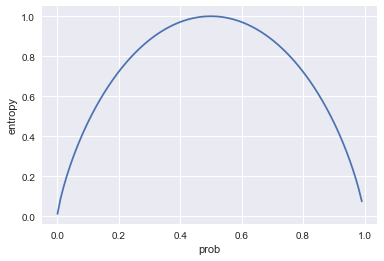

In [62]:
# pの範囲を0~1とするとエラーが出るため、少しずらしている
# pの値を0.001から0.999まで0.01刻みで動かす
p = np.arange(0.001, 0.999, 0.01)

# グラフ化
plt.plot(p, calc_entropy(p)) 
plt.xlabel("prob")
plt.ylabel("entropy")
plt.grid(True)

上記のグラフから、エントロピーは0が最小値で、1が最大値となるのがわかります。エントロピーが1の場合は異なるクラスが等しく混じっている時で、エントロピーが0の場合は全てのデータが同じ分類に属している時です。

イメージとして、以下のリンクが参考になります。pを毒キノコでない確率(+)して、H(S)をエントロピーとすると以下のようになります。エントピーが1の時は毒キノコ(-)と毒キノコでない(+)が等しく入り混じっている状態で、エントロピー0の時は、はっきりと区別されている（p=0の時は-のみ、p=1の時は+のみ）のがわかります。

![](https://image.slidesharecdn.com/decisiontrees-161118165341/95/women-in-data-science-meetup-atx-decision-trees-7-638.jpg?cb=1479488126)
参照URL:https://image.slidesharecdn.com/decisiontrees-161118165341/95/women-in-data-science-meetup-atx-decision-trees-7-638.jpg?cb=1479488126

ここまでの説明で、エントロピーの式と乱雑さの関係については、だいぶイメージがついたのではないでしょうか。次は、先ほどのキノコの例でエントロピーを計算してみましょう。扱っているデータセット(S)は合計で8124レコードありました。また、先ほど目的となる変数をflg付けしましたので、それぞれのクラスに属するデータをカウントしてみることにします。

In [36]:
mush_data_dummy.groupby("flg")["flg"].count()

flg
0    4208
1    3916
Name: flg, dtype: int64

上の集計結果から、毒でないキノコ(0)は4208個、毒キノコ(1)は3916個あります。よって、毒キノコでない割合は

In [37]:
4208 / 8124

0.518

で、0.518となり、毒キノコである割合は、

In [38]:
3916 / 8124

0.482

で、0.482となりましたので、これを上のエントピーを使って考えると、i（クラス）は2つあり、p1=0.518で、p2=0.482なのでこれらを代入すると、エントロピーは

In [82]:
- (0.518 * np.log2(0.518) + 0.482 * np.log2(0.482))

0.999

で、0.999となりました。これで、毒キノコとそうでないキノコが入り混じっているのがわかります。

### **情報利得**について

さて、エントロピーは1に近づけば近づくほど乱雑さを増し、0になるほどよく分類されている、ということでした。次に考えられることとして、どのようにデータを分類したら、この数字（0.999）をもっと小さくできるのかということです。このエントピーが小さければよいので、その方法を考えます。この考え方が、次に説明する**情報利得**という概念になります。情報利得は、ある変数を使ってデータを分割するときに、全体としてどれだけエントロピーを減少（あるいは増加）させることができるのかを評価するために使います。

先ほどと同じcap_color_cとgill_color_bの2つの属性（変数）を使って、どちらが情報として有益なのか、エントロピーや情報利得を使って計算し、考えてみることにします。より情報利得がある方が、有益な情報となります。

まず、cap_colorがcであるか、そうでないかを分けたら2つのグループできますので、それぞれにおいて毒キノコの割合を計算して、それぞれのエントロピーを計算すると以下のようになります。

In [65]:
mush_data_dummy.groupby(["cap_color_c", "flg"])["flg"].count().unstack()

flg,0,1
cap_color_c,,
0,4176,3904
1,32,12


In [83]:
# cap_colorがcでない場合のエントロピー
- ( 4176 / (4176 + 3904)* np.log2(4176 / (4176 + 3904)) + 3904 / (4176 + 3904) * np.log2(3904 / (4176 + 3904)))

0.999

In [84]:
# cap_colorがcである場合のエントロピー
- ( 32 / (32 + 12)* np.log2(32 / (32 + 12)) + 12 / (32 + 12) * np.log2(12 / (32 + 12)))

0.845

さて、分割する前の全体のエントロピーは0.999でした。ここで分割する前のデータを親データセットとよび、先ほど分割したデータを子のデータセットと呼びます。

情報利得を「**親データセットのエントロピー - Σ{(子データセットのサイズ/親データセットのサイズ)×子のデータセットのエントロピー}**」と定義します。ここからこの値が大きければ大きいほど、より有益な情報であるというのがわかります。情報利得が小さいと親データセットとほとんどエントロピーが変わらないので、それほど有益な情報でないと判断します。

まず、Σ{(子データセットのサイズ/親データセットのサイズ)×子のデータセットのエントロピー}を計算すると以下のようになります。

In [85]:
(4176 + 3904) / 8124 * 0.999 + (32 + 12) / 8124 * 0.845

0.998

よって、情報利得は以下になります。

In [86]:
0.999 - 0.998

0.001

情報利得は0.001であまりエントロピーは減少していないことがわかり、それほど有益な情報ではなさそうということがわかります。

一方、gill_colorがbであるかどうかの情報利得を計算しましょう。

In [28]:
mush_data_dummy.groupby(["gill_color_b", "flg"])["flg"].count().unstack()

flg,0,1
gill_color_b,,
0,4208.0,2188.0
1,NaN,1728.0


In [87]:
# gill_colorがbでない場合のエントロピー
- ( 4208 / (4208 + 2188)* np.log2(4208 / (4208 + 2188)) + 2188 / (4208 + 2188) * np.log2(2188 / (4208 + 2188)))

0.927

In [90]:
# gill_colorがbである場合のエントロピー
- (0 + 1728 / (0 + 1728) * np.log2( 1728 / (0 + 1728)))

-0.000

次に、Σ{(子データセットのサイズ/親データセットのサイズ)×子のデータセットのエントロピー}を計算すると以下のようになります。

In [93]:
(4208 + 2188) / 8124 * 0.927 + (0 + 1728) / 8124 * 0

0.730

よって、先ほどと同じように親データセットのエントロピーから上の計算結果を引くと、情報利得は以下になります。

In [94]:
0.999 - 0.73

0.269

情報利得は0.269となりました。

以上より、情報利得について、cap_color_cの場合は0.01で、gill_color_bの場合が0.269になり、gill_color_bの方がよりエントロピーが減少していましたので、gill_color_bが属性として、より情報価値があるというのがわかります（実際に、毒キノコであるかどうかわかったのは、gill_colorがbであるかそうでないかでした）。

これを繰り返して計算し、情報利得が一番大きいものが一番有益な属性情報として判断されます。そしてさらに、条件分岐を実施して枝分かれさせていくのが、このエントロピーによる決定木の計算ロジックになります。上の例では、gill_colorがbであるかどうかを判断した後、bである場合はそこで完全に毒キノコかどうかわかりストップできますが、bでない場合は毒キノコでない数は4208個、毒キノコの数は2188なので、そこからまたある属性を使って条件分岐させていき、それを繰り返して計算するイメージです。

補足として、上記の例では、エントロピーを使ってきましたが、決定木で条件分けをするための他の指標としては、**ジニ不純度、分類誤差（誤分類率）**など色々な手法があります。ジニ不純度は、確率・統計の総合問題で出てきたジニ係数と関わりがあり、「不平等指数」として扱い、偏りが生じるている時はジニ係数が1に近づき、みんな同じような感じであれば、0に近づきました。ジニ不純度もこの考え方と同じです。他、分類誤差などもありますが、指標の詳細な説明については、後で紹介する参考文献等を見てください。


>[参考URL]

>http://blogs.teradata.com/international/ja/hhg14/

>**[やってみよう]**

>ジニ不純度、分類誤差（誤分類率）について調べてみましょう。それぞれどんな指標でしょうか。また実装はどうすればいいでしょうか。

11.2.3項（正則化、ラッソ回帰、リッジ回帰）において、モデルの複雑さに関してコメントしましたが、決定木の場合、モデルの複雑さは分岐数で決定されます。多く分岐すればするほど複雑なモデルになります。

### **決定木**の実装

さて次は、決定木のモジュールとしてDecisionTreeClassifier（分類木）を使い、分岐数の決定にエントロピーを設定します。いつもと同じように、訓練データとテストデータと分けてモデルを構築し、スコアを見てみましょう。

In [89]:
# データの分類
from sklearn.model_selection import train_test_split
# 決定木
from sklearn import tree
from sklearn.tree import  DecisionTreeClassifier

# 説明変数と目的変数
X = mush_data_dummy.drop("flg", axis=1)
Y = mush_data_dummy['flg']

# 学習データとテストデータに分ける
X_train, X_test, y_train, y_test = train_test_split(X,Y, random_state=50)

# 決定木インスタンス（エントロピー、深さ5）
tree_model = DecisionTreeClassifier(criterion='entropy',max_depth=5, random_state=50)

tree_model.fit(X_train,y_train)

print("train:",tree_model.__class__.__name__ ,tree_model.score(X_train,y_train))
print("test:",tree_model.__class__.__name__ , tree_model.score(X_test,y_test))

train: DecisionTreeClassifier 0.879369768587
test: DecisionTreeClassifier 0.881339241753


結果としては、テストデータで88%ほどの正解率です。決定木の分類数決定のパラメータとして、他、max_depthがあり、上では5にしています。深さは条件分岐の数と思っていただければ良いです。決定木はモデルを構築する際に、他のモデルなどでやる標準化や正規化などのデータの前処理は、基本的に必要ありません。ただし、決定木は、分岐数が多い場合に、後で述べる過学習という、モデルの汎化性が失われてしまうことが多いので、気をつけましょう。

**注意：以下2つのセルは、現在(2017/5/3時点)ilect上では実行できませんので、注意してください。今回は参考情報として見てください。（余力のある方は、terminalから環境を構築したり、ローカルで環境を構築してみてください。）**

参考ですが、以下のように可視化することもできます。条件分岐をして、木の形になっているのがイメージできると思います。これが決定木といわれる所以です。ただ、エンコードしているため、少し数値でわかりにくいですが、読み方として具体的には、一番上の変数（X[0]、ここでは説明変数の1番目のカラムのgill_color_b）が0.5より大きいときには右のFalseに進み、その子データセットのサンプル数は1284になり、エントロピーは0になりますので、完全に分かれて（毒かそうでないか）いるのがわかります。つまり、gill_color_bのフラグが1（X[0]<=0.5はFalseになる）のときは、毒になります。

In [90]:
import pydotplus
from sklearn.externals.six import StringIO
from IPython.display import Image

dot_data = StringIO()
tree.export_graphviz(tree_model, out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

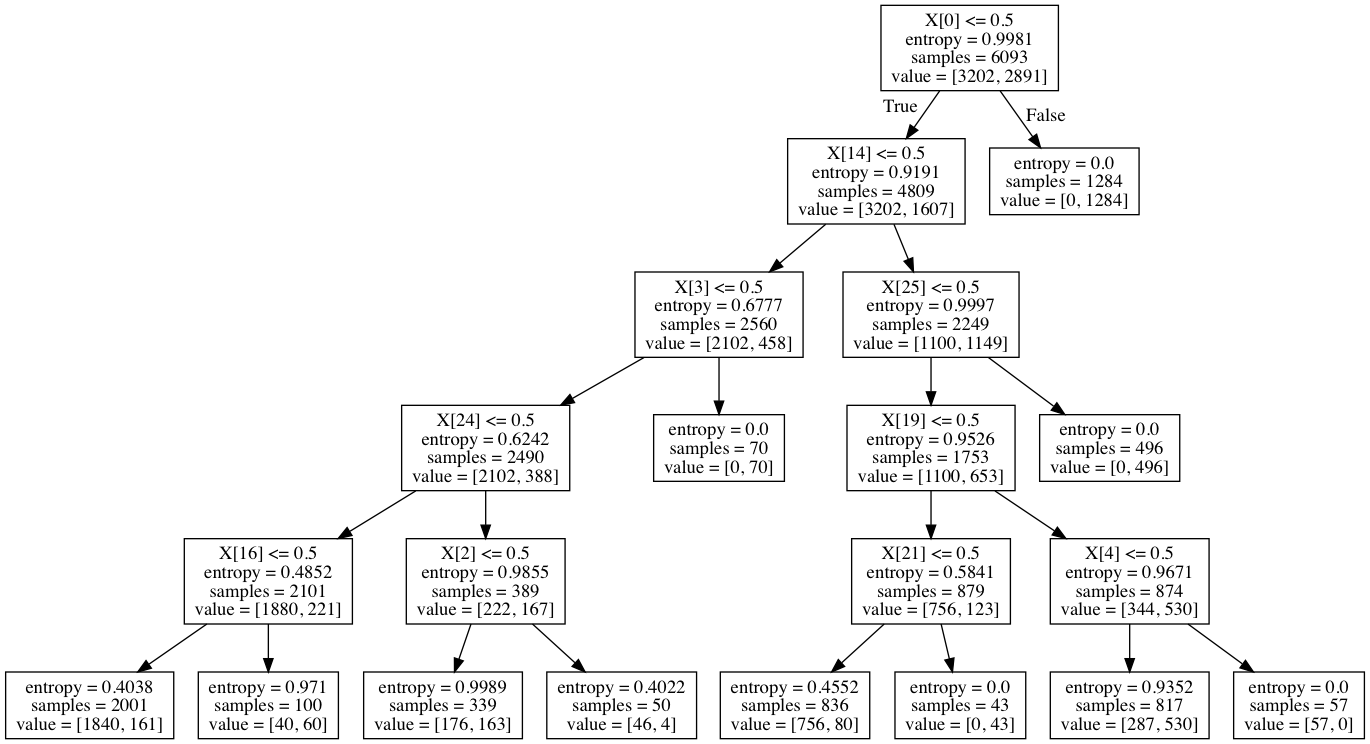

In [91]:
Image(graph.create_png())  

以下は、この決定木を説明するのに、参考にした文献になります。以前にも紹介しましたが、わかりやすく書いてあるので、オススメです。

>[参考文献]

>『戦略的データサイエンス入門 ―ビジネスに活かすコンセプトとテクニック』（Foster Provost (著), Tom Fawcett (著), 竹田 正和(監訳) (翻訳), 古畠 敦 (翻訳), & 8 その他、オライリージャパン）

>[参考URL]

>http://www.data-science-for-biz.com/DSB/Home.html

####  <練習問題 1>
分析対象データとして、sklearnのdatasetsからload_breast_cancerを読み込んで、目的変数をcancer.target、説明変数をcancer.dataとして、決定木のモデルを使って、予測と検証を実施してください。パラメータや深さなどを変更してみて、モデリングしてください。

## 11.6 k-NN
ゴール：k-NN,怠惰学習,memory-based learning,Look-Alike model

次は、**k-NN（k近傍法）**について学びます。これは例えば、あるグループAとグループBがあり、その人たちの属性がわかっているとして、どちらのグループに属するか分からない新しい人が来たケースを考えます。ここで、その人がAとBのどちらのグループに属するか考える際に、その人と属性が近い人はグループAの中に多く含まれるのか、それともグループBに多く含まれるのかを多数決で決めます。その上で、属性が近い人がより多く含まれるグループに、その新しい人が属していると判断します。kとは、多数決に利用する人数となります。k-NNは怠惰学習やmemory-based learningとも言われ、訓練データをそのまま覚えて学習する方法です。

以下は、参照URLにあるイメージです。緑の丸がAグループ、青の丸がBグループとして、赤の丸がどちらのグループか判断することを考えます。k=3の場合に、Aグループが近い人が2名、Bグループに近い人が1名なので、この赤の人はAグループに属すると判断します。さらにkを増やしk=7の場合は、Aグループが近い人が3名、Bグループに近い人が4名なので、この緑の人はBグループに属すると判断します。このようにkの値によって結果が変わるので注意しましょう。

なお、k-NN法は、マーケティングの世界ではLook-Alikeモデルとも言われ、属性が似ている人たちを集めて判断して、それぞれの属性に合ったアプローチを仕掛けていきます。

![comment](http://www.nag-j.co.jp/nagdmc/img/knn.gif)

参照URL：http://www.nag-j.co.jp/nagdmc/img/knn.gif

次は実装で、k-NN法はKNeighborsClassifierを使います。ここでは、kをパラメータ化して、1から10まで変化させて、訓練データとテストデータのスコアの変化を見ています。kが小さい時は、このスコアに乖離がありますが、また6を超えたあたりからまた乖離が生じて、過学習になっているのがわかります。

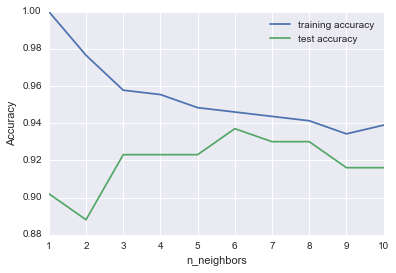

In [238]:
# k-NN 
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import  KNeighborsClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify = cancer.target, random_state=66)

training_accuracy = []
test_accuracy =[]

neighbors_settings = range(1,11)
for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train,y_train)
    
    training_accuracy.append(clf.score(X_train, y_train))
    
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

なお、k-NNは目的変数が連続の場合（回帰）でも実施できます。

>**[やってみよう]**

>k-NNの回帰はどうやって計算されるでしょうか。また、どのように実装するでしょうか。調べて実装してみましょう。

####  <練習問題 1>
以前扱ったキノコのデータに対して、k-NNを使ってモデリングして、検証してみましょう。kパラメータを変更しながら実行してください。

####  <練習問題 2>
以前、記述統計学で使ったデータ（学生のテスト結果と属性データ、student-mat.csv）を用いて、目的となる変数をG3、説明変数となる属性データを以下のようにして、k-NNのkパラメータを変えながら、どのkが最適か考えてみましょう。ただし、目的変数は数値型で、回帰となりますので、KNeighborsRegressorを使ってください。回帰の場合、出力される値は近傍のk個のデータの平均になります。

## 11.7 サポートベクターマシン
ゴール：サポートベクターマシン

**サポートベクターマシン(SVM)**は、訓練データにおいて、他クラスの中で最も近い位置にあるサポートベクタを基準として、距離（マージン）が最も大きくなるように境界線を引く方法です。イメージとしては、以下の参照URLがわかりやすいです。以下の2つのグループを分ける境界線は色々とあるのですが、以下のマージン(距離)が一番大きくなるように計算します。簡単に言うと、あるグループを分けるときに、いろいろと境界線は引けるけど、お互いからなるべく遠いところに境界線を引いた方がいいよねという考え方です。

![comment](http://www.jepoc.or.jp/upload/lib_data/120513120351.jpg)

参照URL：http://www.jepoc.or.jp/upload/lib_data/120513120351.jpg

モジュールはsklearn.svmのLinearSVCを使います。分類問題です。なお、データはcancerを使います。

In [242]:
# SVM
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify = cancer.target, random_state=50)

model = LinearSVC()
clf = model.fit(X_train,y_train)
print("train:",clf.__class__.__name__ ,clf.score(X_train,y_train))
print("test:",clf.__class__.__name__ , clf.score(X_test,y_test))

train: LinearSVC 0.931924882629
test: LinearSVC 0.93006993007


なお、ここでもスケーリング（標準化）をやったあとにモデリングをしてみます。スコアが改善していることがわかります。

In [92]:
# SVM
from sklearn.svm import LinearSVC

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

# 標準化のためのモジュール
from sklearn.preprocessing import StandardScaler

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify = cancer.target, random_state=50)

model = LinearSVC()

# 標準化
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

clf = model.fit(X_train_std,y_train)
print("train:",clf.__class__.__name__ ,clf.score(X_train_std,y_train))
print("test:",clf.__class__.__name__ , clf.score(X_test_std,y_test))

train: LinearSVC 0.985915492958
test: LinearSVC 0.979020979021


上記は、分類問題でしたが、回帰でもサポートベクターマシンは使えますので、調べてみてください。

>**[やってみよう]**

>サポートベクターマシンで回帰を実施する（連続変数を予測する）場合は、どうやって実装するでしょうか。調べてみましょう。

以上で、教師あり学習は終わりになります。それぞれの手法についてあまり深くは立ち入りませんでしたが、実際に実務に使う段階になったら調べてみてください。練習問題、総合問題が終わった後は教師なし学習になります。

####  <練習問題 1>
cancerデータについて、モジュールはsklearn.svmのSVCを使って、cancer.targetを予測するモデルを構築しましょう。model = SVC(kernel='rbf', random_state=0, C=2)としてください。前と同じように、訓練データとテストデータに分けて、標準化してスコアをチェックしてください。

## 11.8 総合問題

### 11.8.1 総合問題1

教師あり学習に関する用語について、それぞれの役割や意味について述べてください。どのような場面で使いますか？ネットや参考文献等も使って調べてみてください。
- 回帰
- 分類
- 教師あり学習
- 重回帰分析
- ロジスティック回帰分析
- 正則化
- リッジ回帰
- ラッソ回帰
- 決定木
- エントロピー
- 情報利得
- k-NN法
- SVM

### 11.8.2 総合問題2
分析対象データとして、sklearnのdatasetsからload_iris(アヤメの花)を読み込んで、目的変数をiris.target、説明変数をiris.dataとして、決定木のモデルを使って、予測と検証を実施してください。目的変数のデータはアヤメの花の種類で、以下の参照URLを見てどんな種類があるのかイメージしてください。

In [1]:
# データの分類
from sklearn.model_selection import train_test_split

# 分析対象データ
from sklearn.datasets import load_iris

# 決定木
from sklearn.tree import DecisionTreeClassifier

# data
iris = load_iris()

![comment](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/iris-machinelearning.png)

参照URL:https://s3.amazonaws.com/assets.datacamp.com/blog_assets/iris-machinelearning.png

### 11.8.3 総合問題3

同じデータ(load_breast_cancer()など)に対して、ロジスティック回帰分析やSVMなど今まで学んだモデルを試し、どれが一番スコアが高いでしょうか？ また、データによって、一番良いスコアが出るモデルは異なりますが、その特徴はどんなものか、考察してください。（これをノーフリーランチといい、どんなデータに対しても、一番良いモデルになるモデルはないということを意味します。）